In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

import sys
sys.path.append("../scripts")
import importlib
import model
import model_plot
importlib.reload(model)
importlib.reload(model_plot)
from model import Model
from model_plot import model_plot

import os

%matplotlib inline

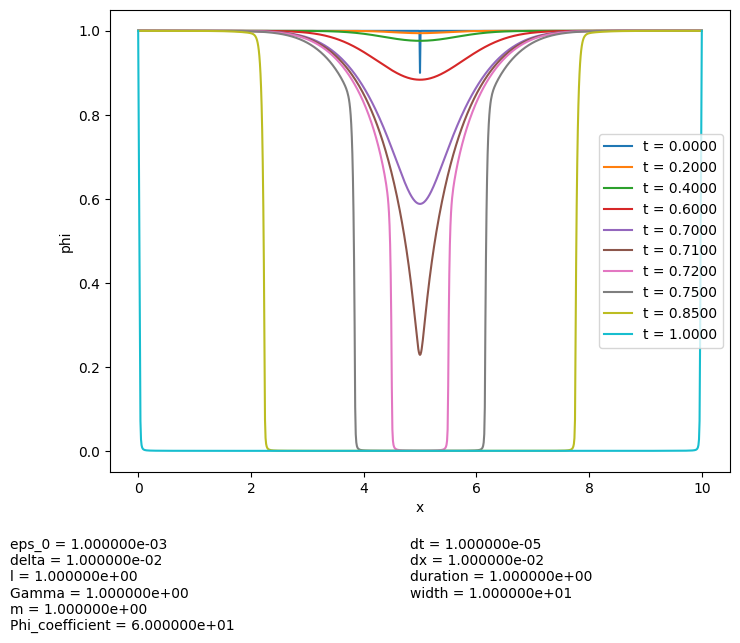

In [18]:
model = Model()
model.from_file('../bin/values_no_nulling_success.csv')
model_plot(model, [0, 0.2, 0.4, 0.6, 0.7, 0.71, 0.72, 0.75, 0.85, 1], figsize=(8, 6))

Обойтись без принудительного обнуления $\varphi$ при $\varphi < 0$ получилось! Однако для этого пришлось сильно увеличить $\delta$.

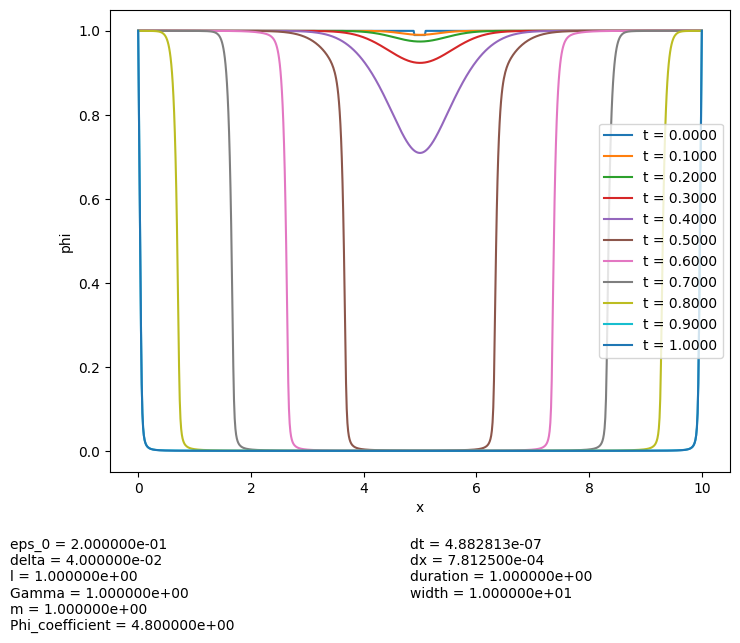

In [49]:
models_size = 12
models = [[] for _ in range(models_size)]
for i in range(models_size):
    for j in range(models_size):
        filename = '../bin/comparison_measurements_2/values_{}_{}.csv'.format(i, j)
        if not os.path.isfile(filename):
            break
        model = Model()
        model.from_file(filename)
        models[i].append(model)
        
model_plot(models[11][7], np.linspace(0, 1, 11), figsize=(8, 6))

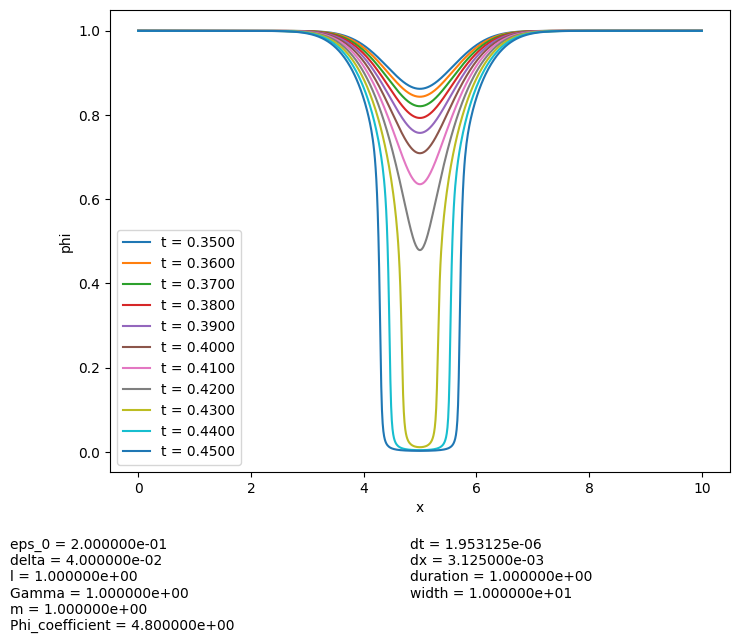

In [50]:
model_plot(models[9][5], np.linspace(0.35, 0.45, 11), figsize=(8, 6))

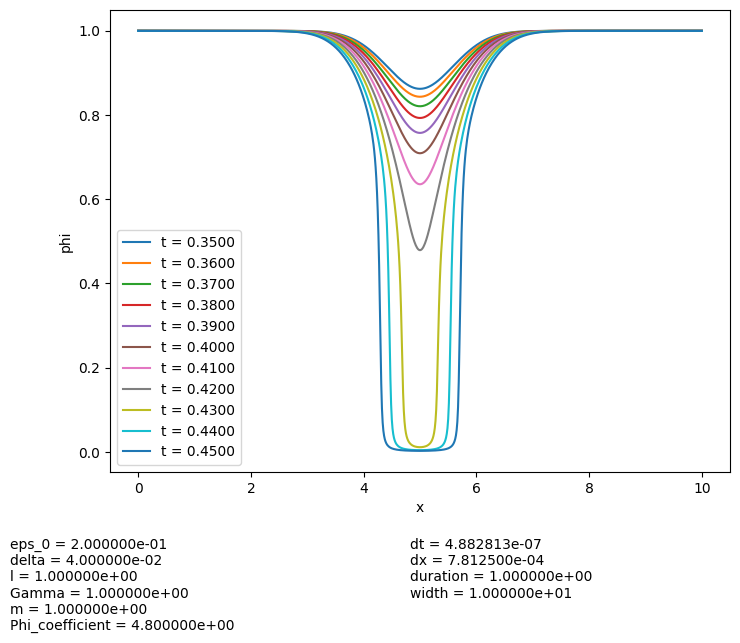

In [51]:
model_plot(models[11][7], np.linspace(0.35, 0.45, 11), figsize=(8, 6))

In [52]:
def calculateError(model_first, model_second, time):
    phi_first = model_first.phi_t(time)
    phi_second = model_second.phi_t(time)
    if len(phi_first) > len(phi_second):
        phi_first, phi_second = phi_second, phi_first
    scale = (len(phi_second) - 1) // (len(phi_first) - 1)
    if len(phi_second) - 1 != scale * (len(phi_first) - 1):
        print('Error! Sizes are {} and {}'.format(len(phi_first), len(phi_second)))
        return None
    result = 0.0
    for i in range(len(phi_first)):
        result += model_first.params['data_dx'] * (phi_first[i] - phi_second[scale * i]) ** 2
    result = np.sqrt(result)
    return result

In [53]:
errors_on_dx = [[np.nan for _ in range(models_size)] for _ in range(models_size)]
for i in range(models_size):
    for j in range(len(models[i])):
        errors_on_dx[i][j] = calculateError(models[i][j], models[i][-1], 0.5)
errors_on_dx = pd.DataFrame(errors_on_dx)
errors_on_dx

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.247602,0.130046,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.249263,0.121780,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.302510,0.159032,0.036799,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.311046,0.161459,0.037022,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.320043,0.168755,0.047462,0.011645,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.321179,0.168759,0.047454,0.011639,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.323198,0.170859,0.051553,0.016635,0.005137,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
8,0.323424,0.170826,0.051543,0.016634,0.005136,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
9,0.324044,0.171630,0.053383,0.018993,0.007602,0.002485,0.000000,NaN,NaN,NaN,NaN,NaN


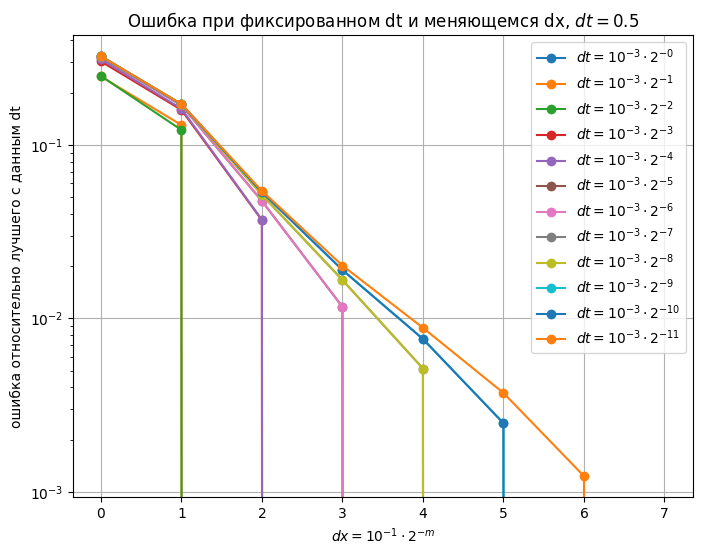

In [54]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.title('Ошибка при фиксированном dt и меняющемся dx, $dt = 0.5$')
plt.xlabel('$dx = 10^{-1} \cdot 2^{-m}$')
plt.ylabel('ошибка относительно лучшего с данным dt')
plt.yscale('log')
for i in range(models_size):
    data = errors_on_dx.iloc[i].dropna()
    plt.plot(data.index, data, '-o')
plt.legend(['$dt = 10^{{-3}} \cdot 2^{{-{}}}$'.format(i) for i in range(models_size)])
plt.show()

In [55]:
errors_on_dt = [[np.nan for _ in range(models_size)] for _ in range(models_size)]
for j in range(len(models[-1])):
    for i in range(models_size):
        if len(models[i]) <= j:
            continue
        errors_on_dt[i][j] = calculateError(models[i][j], models[-1][j], 0.5)
errors_on_dt = pd.DataFrame(errors_on_dt)
errors_on_dt

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.075427,0.123930,0.140171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.026980,0.054541,0.073537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.013609,0.028464,0.036213,0.036931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.006834,0.014858,0.018083,0.018511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.003407,0.007609,0.009086,0.009208,0.009189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.001681,0.003814,0.004511,0.004537,0.004527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000814,0.001864,0.002194,0.002197,0.002192,0.002191,NaN,NaN,NaN,NaN,NaN,NaN
8,0.000380,0.000874,0.001026,0.001026,0.001023,0.001023,NaN,NaN,NaN,NaN,NaN,NaN
9,0.000163,0.000376,0.000441,0.000440,0.000439,0.000438,0.000438,NaN,NaN,NaN,NaN,NaN


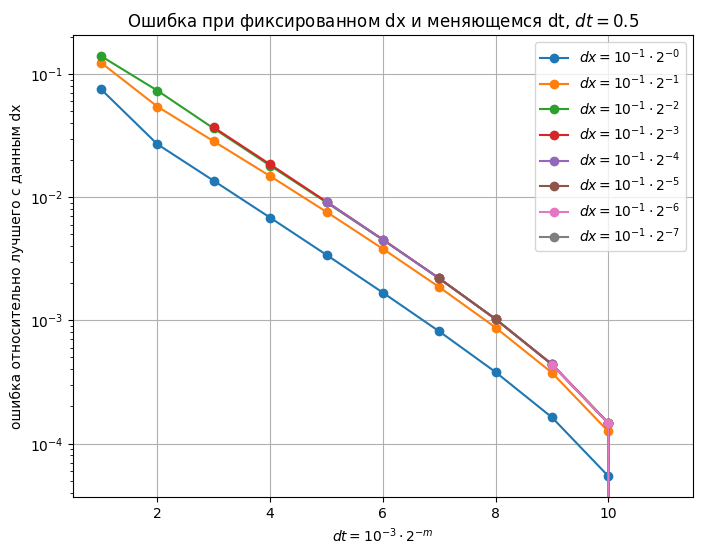

In [56]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.title('Ошибка при фиксированном dx и меняющемся dt, $dt = 0.5$')
plt.xlabel('$dt = 10^{-3} \cdot 2^{-m}$')
plt.ylabel('ошибка относительно лучшего с данным dx')
plt.yscale('log')
legend = []
for j in range(models_size):
    data = errors_on_dt.iloc[:, j].dropna()
    if data.empty:
        break
    plt.plot(data.index, data, '-o')
    legend.append('$dx = 10^{{-1}} \cdot 2^{{-{}}}$'.format(j))
plt.legend(legend)
plt.show()

In [57]:
errors_with_best = [[np.nan for _ in range(models_size)] for _ in range(models_size)]
for i in range(models_size):
    for j in range(len(models[i])):
        errors_with_best[i][j] = calculateError(models[i][j], models[-1][-1], 0.5)
errors_with_best = pd.DataFrame(errors_with_best)
errors_with_best

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.374471,0.270810,0.177161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.347190,0.218862,0.116094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.335846,0.196132,0.083358,0.048457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.330102,0.184410,0.068108,0.032304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.327202,0.178278,0.060956,0.025268,0.014063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.325742,0.175113,0.057503,0.022350,0.010763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.325011,0.173501,0.055812,0.021121,0.009544,0.004540,NaN,NaN,NaN,NaN,NaN,NaN
8,0.324644,0.172686,0.054977,0.020578,0.009099,0.003973,NaN,NaN,NaN,NaN,NaN,NaN
9,0.324460,0.172277,0.054563,0.020325,0.008925,0.003793,0.001338,NaN,NaN,NaN,NaN,NaN


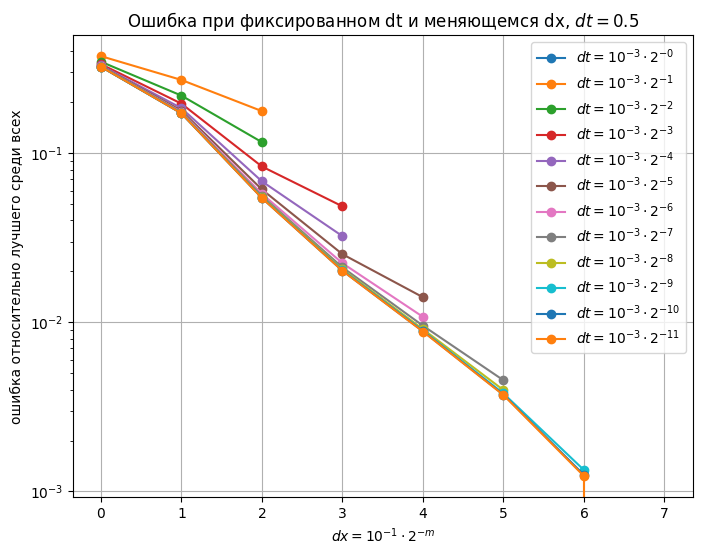

In [58]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.title('Ошибка при фиксированном dt и меняющемся dx, $dt = 0.5$')
plt.xlabel('$dx = 10^{-1} \cdot 2^{-m}$')
plt.ylabel('ошибка относительно лучшего среди всех')
plt.yscale('log')
for i in range(models_size):
    data = errors_with_best.iloc[i].dropna()
    plt.plot(data.index, data, '-o')
plt.legend(['$dt = 10^{{-3}} \cdot 2^{{-{}}}$'.format(i) for i in range(models_size)])
plt.show()

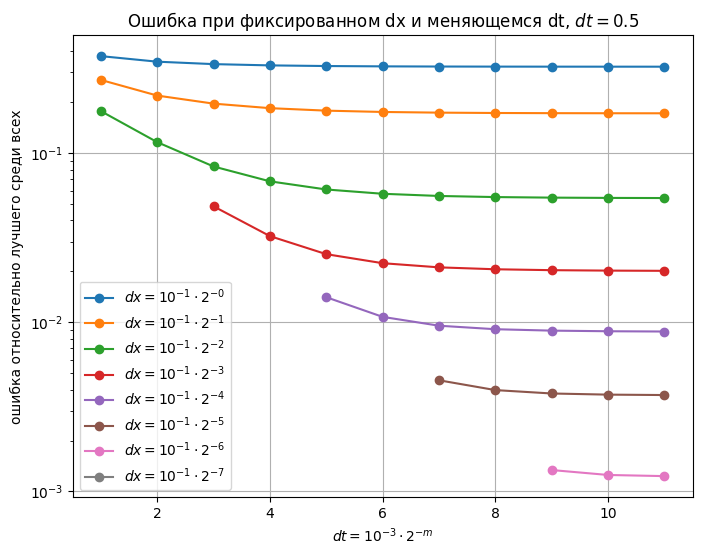

In [60]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.title('Ошибка при фиксированном dx и меняющемся dt, $dt = 0.5$')
plt.xlabel('$dt = 10^{-3} \cdot 2^{-m}$')
plt.ylabel('ошибка относительно лучшего среди всех')
plt.yscale('log')
legend = []
for j in range(models_size):
    data = errors_with_best.iloc[:, j].dropna()
    if data.empty:
        break
    plt.plot(data.index, data, '-o')
    legend.append('$dx = 10^{{-1}} \cdot 2^{{-{}}}$'.format(j))
plt.legend(legend)
plt.show()